<h1>TP 3</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib

from scipy import optimize,stats
from scipy.stats import norm

<h1> Simulation of the risk neutral dynamics in Heston </h1>

Consider a uniform partition / grid 

$$0=t_0<t_1<\ldots<t_N=T$$

of $[0,T]$, where $t_k=k\Delta t$, $k=0,\ldots,N$ and $\Delta t=\frac{T}{N}$.

We will need to simulate $M$ independent samples of two independent ($N$-dimensional) Gaussians which will correspond to the increments $dW$ and $dW^\perp$, $dW_{t_k}=W_{t_{k+1}}-W_{t_k}$, $dW^{\perp}_{t_k}=W^\perp_{t_{k+1}}-W^\perp_{t_k}$, $k=0,\ldots,N-1$.

To simulate the (risk neutral dynamics of) Heston model we follow the following (truncated Euler scheme) starting from the inital price $S_0$ and initial variance $V_0$.


We construct for $k=0,\ldots,N-1$

$$S_{t_{k+1}}=S_{t_k}+rS_{t_k}\Delta t +\sqrt{V_{t_k}^+}S_{t_k}dW_{t_k},$$
$$V_{t_{k+1}}=V_{t_k}+\kappa(\theta-V_{t_k})\Delta t+\eta \sqrt{V_{t_k}^+} (\rho dW_{t_k} +\sqrt{1-\rho^2}dW^\perp_{t_k}).$$

<h2><span style='color:green'>Question 1</span></h2>

Complete the code below to simulate $M$ trajectories of the price of the risky asset and the variance in the Heston model.

In [47]:
def sim_Heston(T,N,M,r,S0,V0,kappa,theta,eta,rho):
    # function to simulate M trajectories of prices and variance in the Heston model
    
    dt = T/N # size of the partition
    times = dt*np.arange(0,N+1) # grid of times
    dW1 = np.sqrt(dt)*np.random.randn(M,N) # dW1 represents the increments dW-a matrix for M(simulations)x N(times)
    dW2 = np.sqrt(dt)*np.random.randn(M,N) # dW2 represents the increments dW^{\perp}
    
    S = np.zeros([M,N+1]) # S is a matrix that will contain the simulated trajectories over the M-lines
    V = np.zeros([M,N+1]) # V is a matrix that will contain the simulated trajectories over the M-lines
    
    # Intitiate S and V
    S[:,0] = S0 
    V[:,0] = V0
    
    # Euler scheme
    for i in range(N):
        S[:,i+1] = S[:,i]+r*S[:,i]*(times[i+1]-times[i]) + np.sqrt(V[:,i])*S[:,i]*(dW1[:,i])
        V[:,i+1] = V[:,i]+kappa*(theta-V[:,i])*(times[i+1]-times[i])+eta*np.sqrt(V[:,i])*(rho*(dW1[:,i])+np.sqrt(1-rho**2)*(dW2[:,i]))
        
    return [times,S,V]

<h2><span style='color:green'>Question 2</span></h2>

Consider the following parameters 

$$T=1,\quad N=250,\quad r=0.01,\quad S_0=100,\quad V_0=0.04,\quad \kappa=1,\quad \theta = 0.04,\quad \eta=0.1,\quad \rho=-0.7$$

Using the function sim_Heston, simulate and plot 

- in one plot 3 trajectories of prices
- in another plot 3 trajectories for variance 

Observe the negative correlation between stock prices and spot variances, this is called the leverage effect.

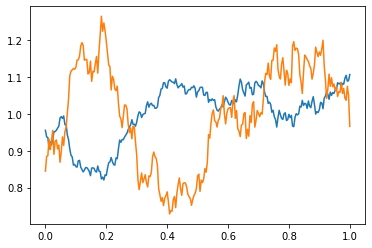

In [48]:
# Use this cell for Q2 :
T=1
N=250
M=3
r=0.01
S0=100
V0=0.04
kappa=1
theta=0.04
eta=0.1
rho=-0.7
dt = T/N # size of the partition

[times,S,V]=sim_Heston(T,N,M,r,S0,V0,kappa,theta,eta,rho)
plt.plot( times , np.array([S[0,:]/np.mean(S[0,:]),V[0,:]/np.mean(V[0,:])]).T)


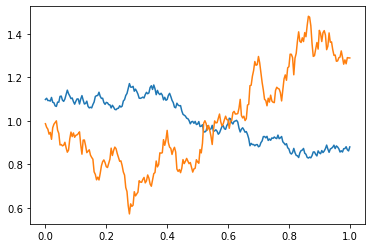

In [49]:

plt.plot( times , np.array([S[1,:]/np.mean(S[1,:]),V[1,:]/np.mean(V[1,:])]).T)


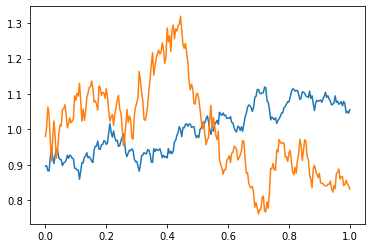

In [50]:
plt.plot( times , np.array([S[2,:]/np.mean(S[2,:]),V[2,:]/np.mean(V[2,:])]).T)


<h1>Pricing a call option by Montecarlo in the Heston model </h1>

We consider a call option with payoff $(S_T-K)_+$. Using $M$ independent samples of $S_T$, 

$$S_T^{(1)},\ldots,S_T^{(M)},$$

the Monte Carlo estimate of the price is

$$price = \mathbb E_{\mathbb{Q}}[{\rm e}^{-rT}(S_T-K)_+] \approx \frac{1}{M}\sum_{j=1}^M {\rm e}^{-rT}(S_T^{(j)}-K)_+=price_{approx}.$$

The 95\% confidence interval can be estimated as

$$\left[price_{approx}-\frac{s*1.96}{\sqrt{M}},price_{approx}+\frac{s*1.96}{\sqrt{M}}\right]$$ 

where $s$ is the empirical standard deviation of $({\rm e}^{-rT}(S^{(i)}_{T}-K)_+)_{i=1}^M$. The size of the interval is

$$2\frac{s*1.96}{\sqrt{M}}$$

<h2><span style='color:green'>Question 3</span></h2>

Complete the code below to estimate the price of a Call option in the Heston model using Monte Carlo. The function also returns the size of the associated 95\% confidence interval.

In [53]:
def Heston_call_price_MC(K,T,N,M,r,S0,V0,kappa,theta,eta,rho):
    # function to approximate the price of a call in Heston model via Monte Carlo
    
    [times,S,V] = sim_Heston(T,N,M,r,S0,V0,kappa,theta,eta,rho) # simulate the paths
    
    C = np.mean(np.exp(-r*T)*np.maximum(S-K,0)) # complete this line - C will be the Monte Carlo estimate of the price           
    
    s =np.var(np.exp(-r*T)*np.maximum(S-K,0)) # complete this line - s will be the empirical standard dev. as described above
    
    L = 2 * s * 1.96 / np.sqrt(M) # Lenght of the 95% confidence interval
    
    return [C,L]

<h2><span style='color:green'>Question 4</span></h2>

Consider the Heston model of Q2. Approximate via Monte Carlo, using $M=10^5$ simulations, the price and the 95% confidence interval for a call option with maturity $T=1$ and strike $K=90$.

In addition compute the implied volatility for this option using the function imp_vol below, which uses itself the function bs_call_price.

In [54]:
def bs_call_price(vol, S, K, tau, r):
    # Black-Scholes-Merton formula for a call
    
    d1 = ((np.log(S/K) + (r + vol ** 2 / 2) * tau) / (np.sqrt(vol ** 2 * tau)))
    d2 = d1 - np.sqrt(vol**2 * tau)
    C = S * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2) 
    
    return C

In [55]:
def imp_vol(K, S0, r, tau, Call_price) :
    def sq_cost(sigma) :
        cost = (Call_price- bs_call_price(sigma[0], S0, K, tau, r))**2
        return cost
    res = optimize.differential_evolution(sq_cost, bounds =[(0,1)], maxiter=100)
    return float(res['x'])

In [ ]:
# Use this cell for Q4:


<h2><span style='color:green'> Question 5: Delta-hedging in Heston </span></h2>

Consider the call option of Q4 above. We are now going to evaluate the performance of a delta-hedge of the form

$$\delta_t = \Phi(d_1)=\Delta_\text{BS}(\sigma_\text{imp},S_t,K,T-t,r)$$

where in $d_1$ we have replaced the volatility parameter $\sigma$ by the implied volatility of the option at time $t=0$, $\sigma_{imp}$.

To evaluate the performance, we follow the same idea as in the last parts of TP1 and TP2 and we compute several P\&Ls for this delta-hedging strategy - a short position in the option (using a function similar to sim_S_X in TP1) and plot the corresponding histogram. 

- How does the performance compare to the case of the Black-Scholes-Merton model? Explain the difference if any. 

You will need in addition to the functions above, the function to calculate the BS_call_delta that we had already used in the previous TPs.

In [258]:
def bs_call_delta(vol, S, K, tau, r):
    # delta for a call
    
    d1 = ((np.log(S/K) + (r + vol ** 2 / 2) * tau) / (np.sqrt(vol ** 2 * tau)))
    
    return norm.cdf(d1)

In [ ]:
# Use this cell to define an appropiate modification in the present context of the function sim_S_X

In [ ]:
# Use this cell for the calculation of the P&Ls and to plot the histograms for Q5